In [ ]:
Nama : Achmad Dany Gunawan

NPM : 20

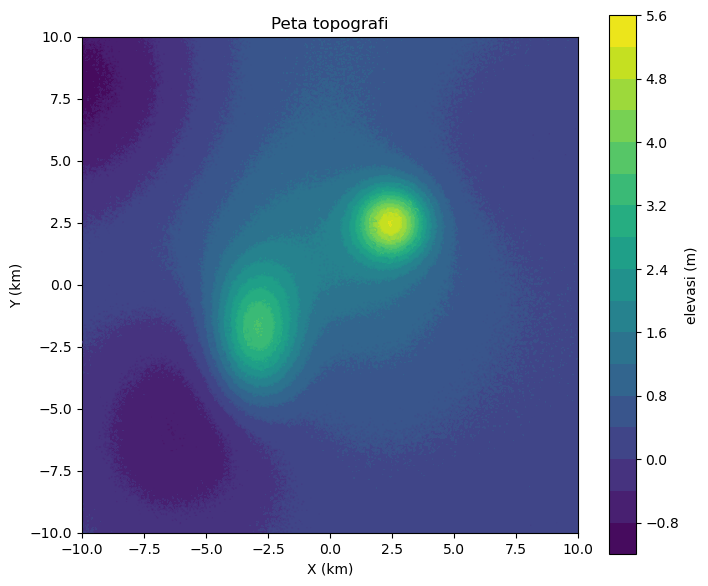

In [59]:
import numpy as np
import matplotlib.pyplot as plt

NPM=75
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope 
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")


Titik maksimum global (PSO) ada di koordinat: (2.42, 2.43) dengan elevasi 5.26 m


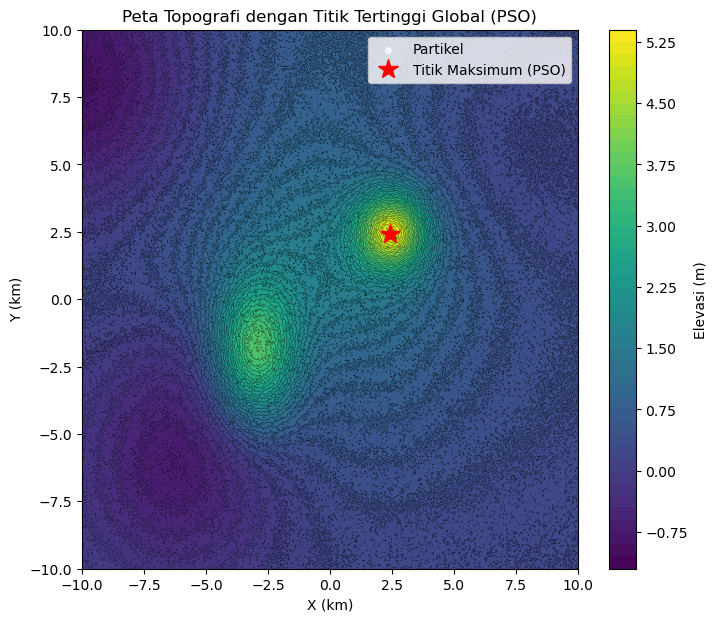

In [62]:
import numpy as np
import matplotlib.pyplot as plt

NPM = 75
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2) 
     + peak(2.5, 2.5, 1.0, 1.0, 4) 
     + peak(0, 0, 3.5, 3.5, 1.2) 
     + peak(6, 6, 4, 4, -0.6)  
     + peak(-10, 8, 3.5, 3.5, -1.2) 
     + peak(-6, -6, 3, 3, -1.0) 
     + peak(-2, -2, 4, 2, -0.6)  
     + peak(2.5, 9.5, 6, 6, 0.75))

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

def elevasi(x, y):
    # cari index terdekat di grid
    ix = np.argmin(np.abs(x - X[0, :]))
    iy = np.argmin(np.abs(y - Y[:, 0]))
    return Z[iy, ix]

# Particle Swarm Optimization (PSO)
n_particles = 30
n_iterations = 100
w = 0.7      # inertia
c1 = 1.5     # cognitive (personal)
c2 = 1.5     # social (global)

pos = np.random.uniform(-10, 10, (n_particles, 2))
vel = np.random.uniform(-1, 1, (n_particles, 2))

pbest_pos = pos.copy()
pbest_val = np.array([elevasi(p[0], p[1]) for p in pos])
gbest_pos = pbest_pos[np.argmax(pbest_val)].copy()
gbest_val = np.max(pbest_val)

# iterasi PSO
for _ in range(n_iterations):
    for i in range(n_particles):
        val = elevasi(pos[i, 0], pos[i, 1])
        if val > pbest_val[i]:
            pbest_val[i] = val
            pbest_pos[i] = pos[i].copy()
        if val > gbest_val:
            gbest_val = val
            gbest_pos = pos[i].copy()
    
    r1, r2 = np.random.rand(), np.random.rand()
    vel = (w * vel 
           + c1 * r1 * (pbest_pos - pos) 
           + c2 * r2 * (gbest_pos - pos))
    pos += vel
    pos = np.clip(pos, -10, 10)  # tetap dalam batas area

print(f"Titik maksimum global (PSO) ada di koordinat: ({gbest_pos[0]:.2f}, {gbest_pos[1]:.2f}) dengan elevasi {gbest_val:.2f} m")

# === Visualisasi ===
plt.figure(figsize=(8, 7))
cf = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
cs = plt.contour(X, Y, Z, levels=50, colors='k', linewidths=0.4, alpha=0.6)
plt.colorbar(cf, label="Elevasi (m)")

plt.scatter(pos[:, 0], pos[:, 1], color="white", s=15, alpha=0.7, label="Partikel")

plt.plot(gbest_pos[0], gbest_pos[1], 'r*', markersize=15, label="Titik Maksimum (PSO)")
plt.title("Peta Topografi dengan Titik Tertinggi Global (PSO)")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.legend()
plt.show()


Kode yang diterapkan dengan metode Particle Swarm Optimization (PSO) berhasil mengidentifikasi titik maksimum global pada peta topografi. Dalam proses ini, sebanyak 30 partikel diatur secara acak pada area peta, kemudian bergerak berdasarkan kombinasi antara pengalaman individu (pbest) dan data kelompok (gbest). Setiap partikel memperbaharui lokasinya selama 100 iterasi, sehingga perlahan-lahan mendekati puncak dengan elevasi tertinggi. Hasil akhir menunjukkan bahwa titik maksimum global terletak di koordinat sekitar (2.42, 2.43) dengan ketinggian sekitar 5.26 meter. Peta menunjukkan visualisasi partikel-partikel berwarna putih yang terdistribusi di wilayah topografi, sedangkan titik puncak ditandai dengan bintang merah yang besar. Dari hasil ini, dapat disimpulkan bahwa PSO sangat efektif dalam menemukan puncak global meskipun data topografi memiliki banyak variasi bukit dan lembah, karena swarm secara alami dapat menghindari terperangkap di puncak lokal dan pada akhirnya berkumpul di titik tertinggi global

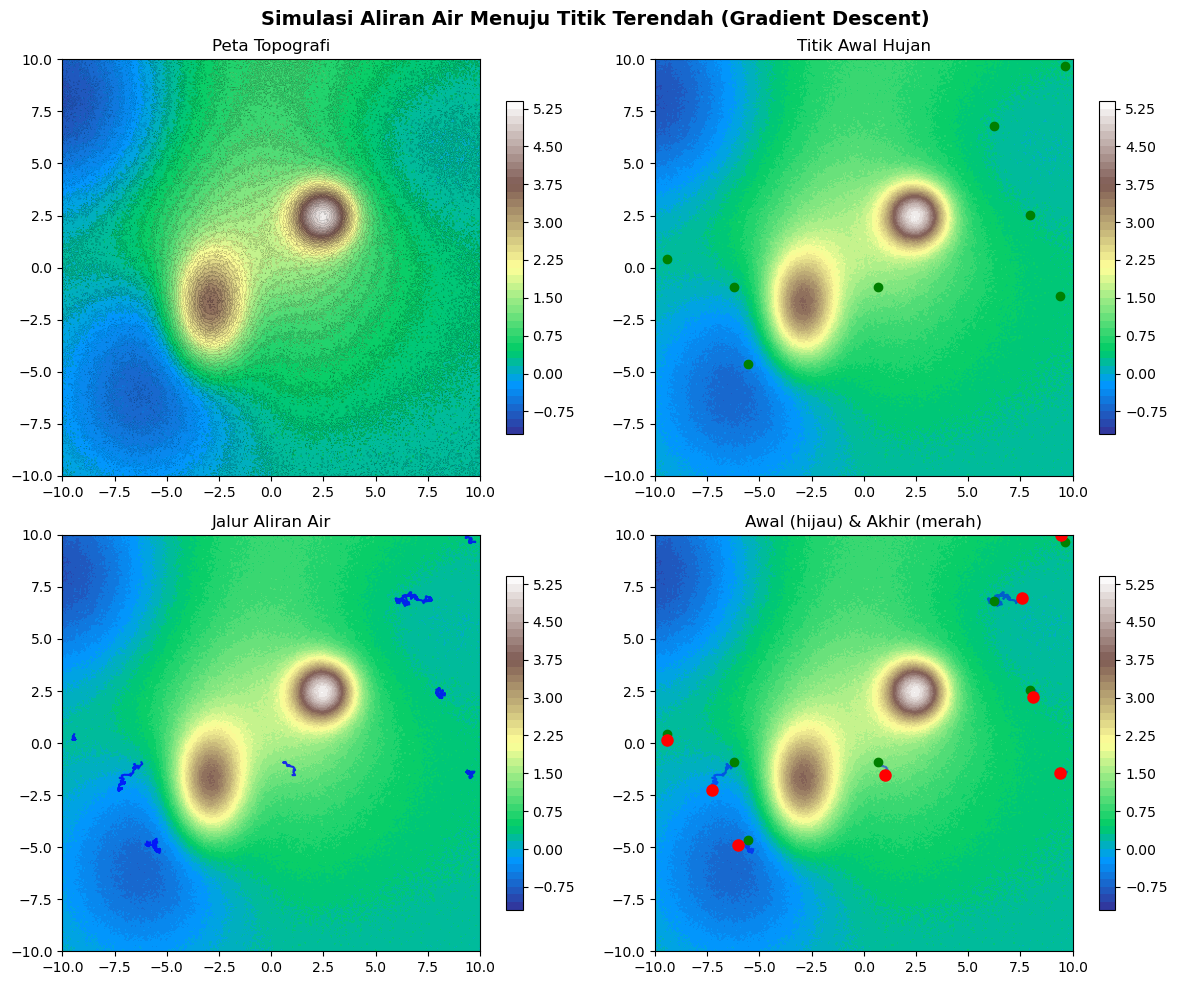

In [140]:
#Mencari titik aliran 'Sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah

import numpy as np
import matplotlib.pyplot as plt

# === SETUP DATA TOPOGRAFI ===
NPM = 75
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
dx, dy = x[1] - x[0], y[1] - y[0]
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2) 
     + peak(2.5, 2.5, 1.0, 1.0, 4) 
     + peak(0, 0, 3.5, 3.5, 1.2) 
     + peak(6, 6, 4, 4, -0.6)  
     + peak(-10, 8, 3.5, 3.5, -1.2) 
     + peak(-6, -6, 3, 3, -1.0) 
     + peak(-2, -2, 4, 2, -0.6)  
     + peak(2.5, 9.5, 6, 6, 0.75))

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# === GRADIENT DESCENT ===
def grad_z(xp, yp):
    ix = np.argmin(np.abs(xp - X[0, :]))
    iy = np.argmin(np.abs(yp - Y[:, 0]))
    zx = (Z[iy, min(ix+1, nx-1)] - Z[iy, max(ix-1, 0)]) / (2 * dx)
    zy = (Z[min(iy+1, ny-1), ix] - Z[max(iy-1, 0), ix]) / (2 * dy)
    return np.array([zx, zy])

# Simulasi aliran beberapa tetes hujan
n_drops = 8
paths = []
for _ in range(n_drops):
    pos = np.random.uniform(-10, 10, 2)  # titik awal acak
    path = [pos.copy()]
    for _ in range(200):
        g = grad_z(pos[0], pos[1])
        pos = pos - 0.1 * g
        pos = np.clip(pos, -10, 10)
        path.append(pos.copy())
        if np.linalg.norm(g) < 1e-3:
            break
    paths.append(np.array(path))

# === VISUALISASI 4 PANEL ===
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Simulasi Aliran Air Menuju Titik Terendah (Gradient Descent)", fontsize=14, fontweight="bold")

# Panel 1: Peta topografi
cf1 = axs[0,0].contourf(X, Y, Z, levels=50, cmap="terrain")
axs[0,0].contour(X, Y, Z, levels=50, colors='k', linewidths=0.2, alpha=0.5)
axs[0,0].set_title("Peta Topografi")
fig.colorbar(cf1, ax=axs[0,0], shrink=0.8)

# Panel 2: Titik awal hujan
cf2 = axs[0,1].contourf(X, Y, Z, levels=50, cmap="terrain")
for path in paths:
    axs[0,1].plot(path[0,0], path[0,1], 'go', markersize=6)
axs[0,1].set_title("Titik Awal Hujan")
fig.colorbar(cf2, ax=axs[0,1], shrink=0.8)

# Panel 3: Jalur aliran
cf3 = axs[1,0].contourf(X, Y, Z, levels=50, cmap="terrain")
for path in paths:
    axs[1,0].plot(path[:,0], path[:,1], '-b', alpha=0.8)
axs[1,0].set_title("Jalur Aliran Air")
fig.colorbar(cf3, ax=axs[1,0], shrink=0.8)

# Panel 4: Titik awal & akhir
cf4 = axs[1,1].contourf(X, Y, Z, levels=50, cmap="terrain")
for path in paths:
    axs[1,1].plot(path[:,0], path[:,1], '-b', alpha=0.5)
    axs[1,1].plot(path[0,0], path[0,1], 'go', markersize=6)
    axs[1,1].plot(path[-1,0], path[-1,1], 'ro', markersize=8)
axs[1,1].set_title("Awal (hijau) & Akhir (merah)")
fig.colorbar(cf4, ax=axs[1,1], shrink=0.8)

plt.tight_layout()
plt.show()


Dari visualisasi empat panel di atas, kita dapat mengamati bagaimana simulasi aliran air yang dihasilkan oleh metode gradient descent mampu merepresentasikan perilaku air hujan yang jatuh di area topografi berbukit. Panel pertama menunjukkan peta topografi dasar dengan garis kontur yang menyoroti posisi puncak dan lembah di permukaan. Panel kedua menampilkan titik awal tetesan hujan yang digambarkan sebagai titik hijau acak di berbagai posisi permukaan, menunjukkan variasi lokasi awal aliran air. Pada panel ketiga tampak jalur biru yang menunjukkan arah aliran air mengikuti kontur permukaan tanah, di mana air selalu bergerak menurun menuju wilayah dengan ketinggian lebih rendah. Panel terakhir menunjukkan kombinasi antara titik awal (hijau) dan titik akhir (merah), yang menunjukkan posisi akhir air setelah sampai di lembah.

Kode yang diterapkan untuk menghasilkan peta topografi dengan cara menyusun beberapa fungsi Gaussian (peak) yang mewakili bukit dan lembah, ditambah dengan elemen kemiringan global serta noise acak agar terlihat lebih nyata. Selanjutnya, metode penurunan gradien digunakan untuk menentukan arah penurunan elevasi di setiap tahap, sehingga air tampak bergerak perlahan ke titik terendah. Iterasi dilakukan berulang kali untuk sejumlah tetes hujan yang berbeda, sehingga kita dapat mengamati pola agregasi arus. Dari hasilnya, tampak bahwa tetesan air yang jatuh di sekitar puncak atau lereng akhirnya berkumpul di titik lembah yang sama, menggambarkan bagaimana sungai atau aliran air terbentuk secara alami mengikuti bentuk tanah

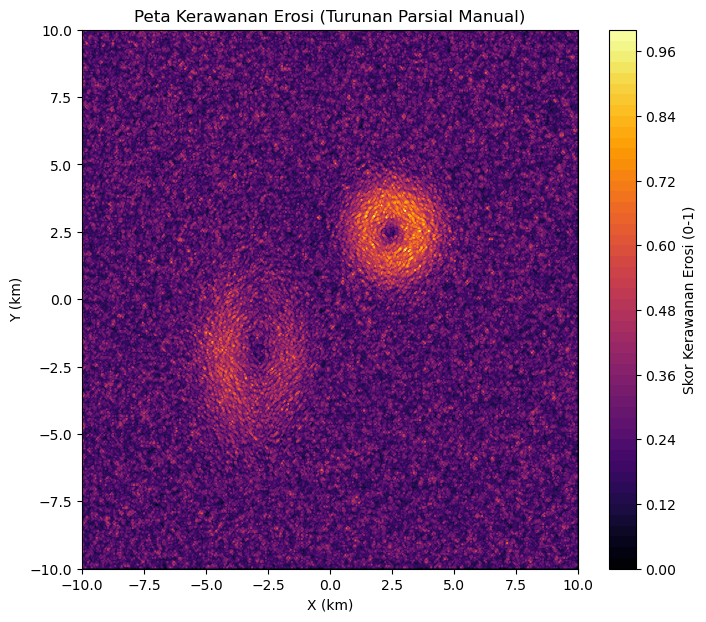

In [162]:
#kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik

import numpy as np
import matplotlib.pyplot as plt

# === SETUP DATA TOPOGRAFI (SAMA SEPERTI SEBELUMNYA) ===
NPM = 75
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2) 
     + peak(2.5, 2.5, 1.0, 1.0, 4) 
     + peak(0, 0, 3.5, 3.5, 1.2) 
     + peak(6, 6, 4, 4, -0.6)  
     + peak(-10, 8, 3.5, 3.5, -1.2) 
     + peak(-6, -6, 3, 3, -1.0) 
     + peak(-2, -2, 4, 2, -0.6)  
     + peak(2.5, 9.5, 6, 6, 0.75))

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# === TURUNAN PARSIAL DENGAN FINITE DIFFERENCE ===
dx = x[1] - x[0]
dy = y[1] - y[0]

dz_dx = np.zeros_like(Z)
dz_dy = np.zeros_like(Z)

# menghitung turunan parsial manual
for i in range(1, ny-1):
    for j in range(1, nx-1):
        dz_dx[i, j] = (Z[i, j+1] - Z[i, j-1]) / (2 * dx)
        dz_dy[i, j] = (Z[i+1, j] - Z[i-1, j]) / (2 * dy)

slope_manual = np.sqrt(dz_dx**2 + dz_dy**2)

# normalisasi
erosion_risk_manual = (slope_manual - slope_manual.min()) / (slope_manual.max() - slope_manual.min())

# VISUALISASI
plt.figure(figsize=(8, 7))
cf = plt.contourf(X, Y, erosion_risk_manual, levels=50, cmap="inferno")
plt.colorbar(cf, label="Skor Kerawanan Erosi (0-1)")
plt.title("Peta Kerawanan Erosi (Turunan Parsial Manual)")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.show()


Kode tersebut terlebih dahulu membuat medan topografi tiruan dengan menggabungkan beberapa puncak Gaussian, ditambah komponen gradien global dan sedikit noise, kemudian menghitung turunan parsial elevasi secara manual dengan menggunakan skema central finite-difference di setiap titik grid (selisih tengah antara tetangga kiri-kanan dan atas-bawah). Dengan menyatukan elemen gradien ∂Z/∂x dan ∂𝑍/∂𝑦 menjadi magnitude gradien agnitude gradien sqrt(𝑑𝑍/𝑑𝑥)² +(𝑑𝑍/𝑑𝑦)² didapatkan ukuran kemiringan lereng di setiap sel; setelah dinormalisasi ke rentang 0–1, peta hasil menunjukkan nilai kerentanan erosi — semakin terang (mendekati 1) menunjukkan semakin curam dan dengan demikian semakin rentan terhadap erosi. Dalam gambar tampak lingkaran terang yang mengelilingi puncak bukit, yang wajar karena lereng curam berada di sisi bukit (bukan tepat di puncak datar), dan area latar yang bertekstur mencerminkan efek noise kecil pada medan yang menciptakan variasi kecuraman lokal; tepian peta cenderung lebih stabil karena turunan di batas tidak dihitung secara menyeluruh dalam loop. Secara praktis, artinya: area cerah pada peta menunjukkan lereng curam yang memerlukan perhatian mitigasi erosi (seperti vegetasi penahan atau pemrosesan kontur), sementara area gelap lebih aman dari risiko erosi yang berfokus pada kemiringan saja; penting untuk dicatat bahwa ini adalah model kemiringan sederhana—untuk penilaian erosi yang lebih akurat, disarankan untuk menambahkan faktor lain (jenis tanah, curah hujan, penggunaan lahan) serta opsi perbaikan data atau skema turunan lebih tinggi untuk mengurangi efek kebisingan.

Leveling to MEAN elevation:
  target elevation Zt = 0.5016 m
  cut volume = 109,982,418 m^3
  fill volume = 109,982,418 m^3
  net (cut - fill) = 0 m^3

Leveling to MASS-CONSERVING elevation (cut == fill):
  target elevation Zt = 0.5016 m
  cut volume = 109,982,418 m^3
  fill volume = 109,982,418 m^3
  net (cut - fill) = 0 m^3


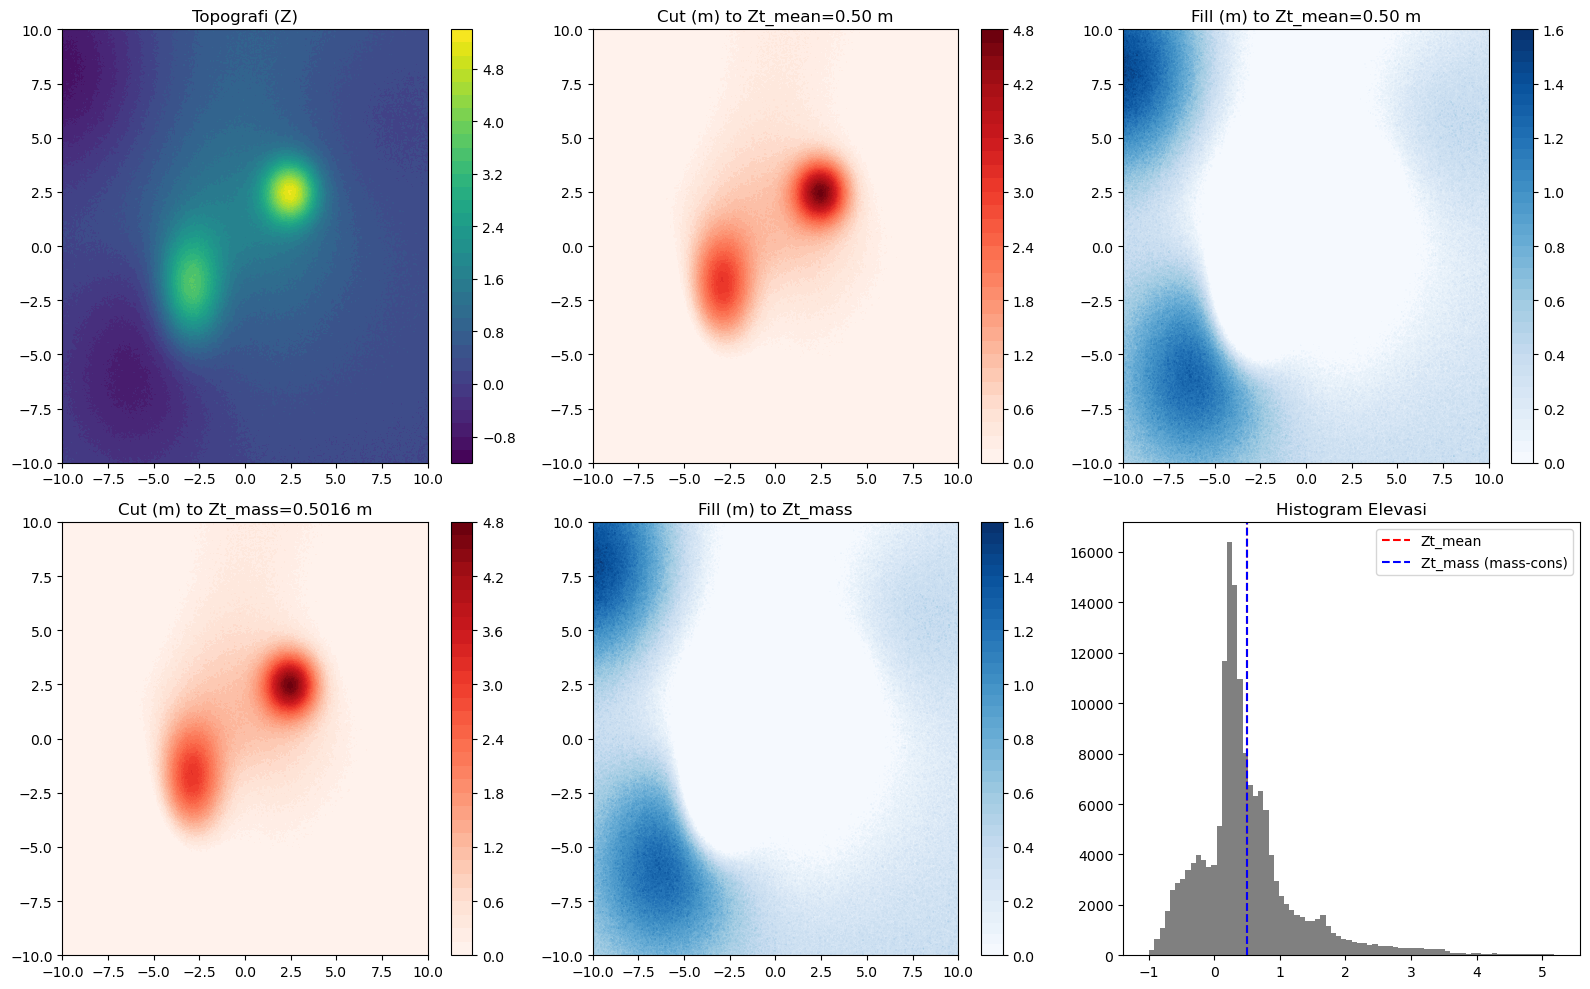

In [153]:
#jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah)

import numpy as np
import matplotlib.pyplot as plt

# --- 1) BUAT DATA TOPOGRAFI (sama seperti sebelumnya) ---
NPM = 75
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)    
y = np.linspace(-10, 10, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]
cell_area = dx * dy  # (km^2) per cell
# if you want m^2, convert: 1 km = 1000 m => (dx*1000)*(dy*1000) = cell_area*(1e6)
cell_area_m2 = cell_area * 1e6  # m^2

X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2)
     + peak(2.5, 2.5, 1.0, 1.0, 4)
     + peak(0, 0, 3.5, 3.5, 1.2)
     + peak(6, 6, 4, 4, -0.6)
     + peak(-10, 8, 3.5, 3.5, -1.2)
     + peak(-6, -6, 3, 3, -1.0)
     + peak(-2, -2, 4, 2, -0.6)
     + peak(2.5, 9.5, 6, 6, 0.75))

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape) 

# --- 2) fungsi hitung cut/fill untuk target elevasi Zt ---
def cut_fill_for_target(Z, Zt, cell_area_m2):
    """
    Z : 2D array of elevation (m)
    Zt: scalar target elevation (m)
    cell_area_m2: cell area in m^2
    returns: (cut_volume_m3, fill_volume_m3, cut_map, fill_map)
    """
    diff = Z - Zt
    cut_map = np.maximum(diff, 0.0)   # meters of soil to remove per cell
    fill_map = np.maximum(-diff, 0.0) # meters of soil to add per cell
    cut_vol = np.sum(cut_map) * cell_area_m2   # m^3
    fill_vol = np.sum(fill_map) * cell_area_m2 # m^3
    return cut_vol, fill_vol, cut_map, fill_map

# --- 3) jika mau target yang mengonservasi volume: cari Zt sehingga cut_vol ~= fill_vol ---
def find_mass_conserving_target(Z, cell_area_m2, tol=1e-3, max_iter=100):
    """
    Find Zt such that cut_vol(Zt) - fill_vol(Zt) = 0 using bisection.
    tol in cubic meters relative to total volume, or in elevation units? We'll check by volume.
    """
    z_min = float(np.min(Z)) - 1.0
    z_max = float(np.max(Z)) + 1.0

    # function: f(Zt) = cut_vol(Zt) - fill_vol(Zt)
    def f(Zt):
        cut_vol, fill_vol, _, _ = cut_fill_for_target(Z, Zt, cell_area_m2)
        return cut_vol - fill_vol

    f_min = f(z_min)
    f_max = f(z_max)
    if f_min * f_max > 0:
        # unlikely, but fallback: return mean elevation
        return float(np.mean(Z))

    lower, upper = z_min, z_max
    for _ in range(max_iter):
        mid = 0.5 * (lower + upper)
        val = f(mid)
        if abs(val) < 1e-6:  # m^3 tolerance absolute
            return mid
        if val * f_min > 0:
            lower = mid
            f_min = val
        else:
            upper = mid
            f_max = val
    return 0.5 * (lower + upper)

Zt_mean = float(np.mean(Z))
cut_mean, fill_mean, cut_map_mean, fill_map_mean = cut_fill_for_target(Z, Zt_mean, cell_area_m2)

Zt_mass = find_mass_conserving_target(Z, cell_area_m2)
cut_mass, fill_mass, cut_map_mass, fill_map_mass = cut_fill_for_target(Z, Zt_mass, cell_area_m2)

print("Leveling to MEAN elevation:")
print(f"  target elevation Zt = {Zt_mean:.4f} m")
print(f"  cut volume = {cut_mean:,.0f} m^3")
print(f"  fill volume = {fill_mean:,.0f} m^3")
print(f"  net (cut - fill) = {cut_mean - fill_mean:,.0f} m^3")
print()
print("Leveling to MASS-CONSERVING elevation (cut == fill):")
print(f"  target elevation Zt = {Zt_mass:.4f} m")
print(f"  cut volume = {cut_mass:,.0f} m^3")
print(f"  fill volume = {fill_mass:,.0f} m^3")
print(f"  net (cut - fill) = {cut_mass - fill_mass:,.0f} m^3")

fig, axs = plt.subplots(2, 3, figsize=(16, 10))
axs = axs.ravel()

cf0 = axs[0].contourf(X, Y, Z, levels=40, cmap="viridis")
axs[0].set_title("Topografi (Z)")
plt.colorbar(cf0, ax=axs[0])

cf1 = axs[1].contourf(X, Y, cut_map_mean, levels=40, cmap="Reds")
axs[1].set_title(f"Cut (m) to Zt_mean={Zt_mean:.2f} m")
plt.colorbar(cf1, ax=axs[1])
cf2 = axs[2].contourf(X, Y, fill_map_mean, levels=40, cmap="Blues")
axs[2].set_title(f"Fill (m) to Zt_mean={Zt_mean:.2f} m")
plt.colorbar(cf2, ax=axs[2])

cf3 = axs[3].contourf(X, Y, cut_map_mass, levels=40, cmap="Reds")
axs[3].set_title(f"Cut (m) to Zt_mass={Zt_mass:.4f} m")
plt.colorbar(cf3, ax=axs[3])

cf4 = axs[4].contourf(X, Y, fill_map_mass, levels=40, cmap="Blues")
axs[4].set_title("Fill (m) to Zt_mass")
plt.colorbar(cf4, ax=axs[4])

axs[5].hist(Z.ravel(), bins=80, color='gray')
axs[5].axvline(Zt_mean, color='red', linestyle='--', label='Zt_mean')
axs[5].axvline(Zt_mass, color='blue', linestyle='--', label='Zt_mass (mass-cons)')
axs[5].set_title("Histogram Elevasi")
axs[5].legend()

plt.tight_layout()
plt.show()


Kode di atas awalnya menciptakan medan elevasi Z dan kemudian menghitung jumlah tanah yang harus dipindahkan jika medan ingin diratakan ke elevasi target tertentu. Dua skenario diilustrasikan: leveling ke elevasi rata-rata (Zt_mean) dan leveling ke elevasi yang mempertahankan volume (Zt_mass) sehingga total volume yang diambil dari area tinggi sama dengan total volume yang ditambahkan pada area rendah. Pada setiap sel grid, perbedaan elevasi diubah menjadi volume dengan mengalikan luas sel (cell_area_m2), kemudian dijumlahkan. Hasil numerik (potong, isi) memberikan kamu perkiraan volume meter kubik material yang harus dipindahkan. Peta cut/fill dan histogram elevasi berfungsi untuk memvisualisasikan lokasi pemotongan tanah (area merah) dan tempat pengurugan tanah (area biru). Apabila hasil cut lebih besar dari fill untuk target spesifik, berarti terdapat kelebihan material yang perlu dibuang atau disimpan; sedangkan jika cut lebih kecil dari fill, berarti diperlukan material tambahan dari luar lokasi. Kamu dapat mengatur Zt sesuai dengan kebijakan proyek (mis. elevasi terendah tertentu, elevasi jalan, dll.), dan mempertimbangkan faktor nyata lainnya seperti kepadatan tanah, penyusutan, atau faktor kehilangan saat pemindahan

In [160]:
#berapa ketinggian akhir tanah yang rata tersebut?

import numpy as np

NPM = 75
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2) 
     + peak(2.5, 2.5, 1.0, 1.0, 4) 
     + peak(0, 0, 3.5, 3.5, 1.2) 
     + peak(6, 6, 4, 4, -0.6)  
     + peak(-10, 8, 3.5, 3.5, -1.2) 
     + peak(-6, -6, 3, 3, -1.0) 
     + peak(-2, -2, 4, 2, -0.6)  
     + peak(2.5, 9.5, 6, 6, 0.75))

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)
def volume_diff(Zt):
    cut = np.sum((Z - Zt)[Z > Zt])
    fill = np.sum((Zt - Z)[Z < Zt])
    return cut - fill

Zmin, Zmax = Z.min(), Z.max()
for _ in range(50):  # metode bisection
    Zt = (Zmin + Zmax) / 2
    if volume_diff(Zt) > 0:
        Zmin = Zt
    else:
        Zmax = Zt

Zt_final = (Zmin + Zmax) / 2

print(f"Ketinggian akhir tanah rata (cut = fill) adalah {Zt_final:.2f} m")


Ketinggian akhir tanah rata (cut = fill) adalah 0.50 m


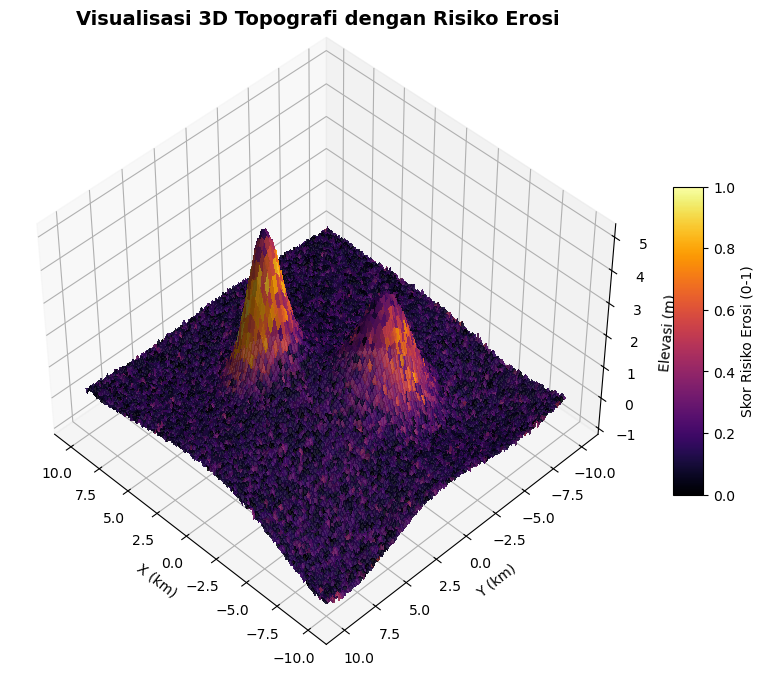

In [172]:
#code Tambahan - Visualisasi 3D Topografi dengan Resiko Erosi
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === SETUP DATA TOPOGRAFI ===
NPM = 75
np.random.seed(NPM)

nx, ny = 200, 200
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2) 
     + peak(2.5, 2.5, 1.0, 1.0, 4) 
     + peak(0, 0, 3.5, 3.5, 1.2) 
     + peak(6, 6, 4, 4, -0.6)  
     + peak(-10, 8, 3.5, 3.5, -1.2) 
     + peak(-6, -6, 3, 3, -1.0) 
     + peak(-2, -2, 4, 2, -0.6)  
     + peak(2.5, 9.5, 6, 6, 0.75))

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# === HITUNG RISIKO EROSI DARI KEMIRINGAN LERENG ===
dx = x[1] - x[0]
dy = y[1] - y[0]

dz_dx, dz_dy = np.gradient(Z, dx, dy)
slope = np.sqrt(dz_dx**2 + dz_dy**2)
erosion_risk = (slope - slope.min()) / (slope.max() - slope.min())

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, facecolors=plt.cm.inferno(erosion_risk),
                       rstride=2, cstride=2, linewidth=0, antialiased=False, alpha=0.9)

m = plt.cm.ScalarMappable(cmap="inferno")
m.set_array(erosion_risk)
fig.colorbar(m, ax=ax, shrink=0.5, aspect=10, label="Skor Risiko Erosi (0-1)")

ax.set_title("Visualisasi 3D Topografi dengan Risiko Erosi", fontsize=14, fontweight="bold")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Elevasi (m)")
ax.view_init(elev=45, azim=135)  

plt.show()


Kode itu menciptakan model topografi tiruan dengan memanfaatkan beberapa fungsi eksponensial untuk menghasilkan puncak dan lembah yang memiliki ketinggian bervariasi. Setelah itu, program menghitung kemiringan lereng (slope) menggunakan np.gradient() untuk menilai tingkat risiko erosi, di mana semakin curam lerengnya, semakin tinggi risikonya. Risiko ini selanjutnya dinormalisasi dalam rentang 0–1 dan divisualisasikan dalam grafik 3D.

Pada hasil visual, warna cerah (kuning–oranye) menunjukkan wilayah dengan kemiringan tajam dan potensi erosi tinggi, sedangkan warna gelap (ungu–hitam) menandakan area datar dengan risiko rendah. Dua puncak utama terlihat jelas mencolok di tengah peta, menunjukkan ketinggian yang signifikan serta potensi besar terhadap erosi. Visualisasi ini menunjukkan keterkaitan antara topografi dan kerentanan terhadap erosi dengan cara yang informatif dan jelas